In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("train.csv")
# fig = plt.Figure(figsize=(25, 10), dpi= 80,facecolor='w', edgecolor='k')

<h1>Analysis below</h1>

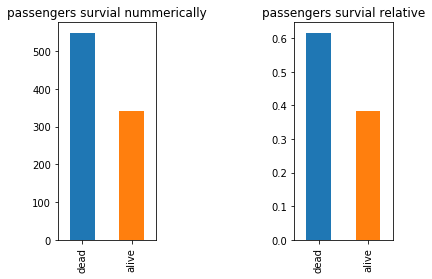

In [5]:
#check the the survival of the passengers
plt.subplot2grid((1,3),(0,0))
df.Survived.value_counts().plot(kind="bar")
plt.xticks([1,0],["alive","dead"])
plt.title("passengers survial nummerically")
plt.subplot2grid((1,3),(0,2))
#check the the survival of the passengers as percentage
df.Survived.value_counts(normalize=True ).plot(kind="bar")
plt.title("passengers survial relative")
plt.xticks([1,0],["alive","dead"])
plt.show()

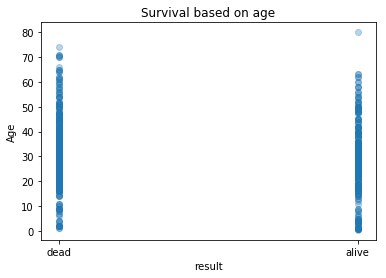

In [6]:
# age to survival 
plt.scatter(df.Survived,df.Age,alpha=.3)
plt.xticks([1,0],["alive","dead"])
plt.ylabel("Age")
plt.xlabel("result")
plt.title("Survival based on age")
plt.show()
plt.clf()

Text(0.5,1,"Passanger's class")

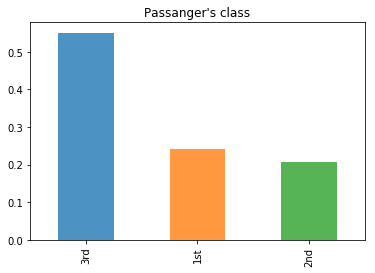

In [7]:
df.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=.8)
plt.xticks([0,1,2],["3rd","1st","2nd"])
plt.title("Passanger's class")

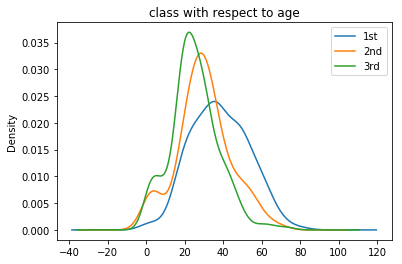

In [8]:
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.title("class with respect to age")
plt.legend(("1st","2nd","3rd"))
plt.show()
plt.clf()


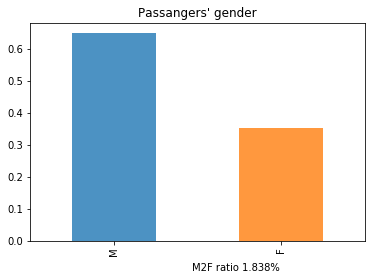

In [9]:
# sex data minified
df.Sex=df.Sex.map(lambda a:a[0].upper())
sex_count_data=df.Sex.value_counts(normalize=True)
sex_count_data.plot(kind="bar",alpha=.8)
plt.title("Passangers' gender")
plt.figtext(.5, .02, "M2F ratio {:.3f}%".format(sex_count_data[0]/sex_count_data[1]))
plt.show()

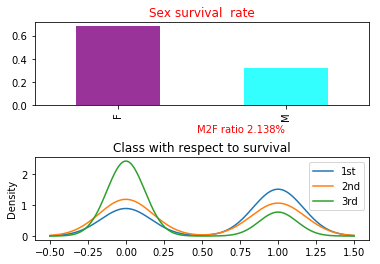

In [10]:
# sex survival 
plt.subplot2grid((5,4),(0,0),colspan=5,rowspan=2)
sex_count_data=df.Sex[df.Survived==True].value_counts(normalize=True)
sex_count_data.plot(kind="bar",alpha=.8,color=["purple",'cyan'])
plt.title("Sex survival  rate", color="red")
plt.figtext(.5, .5, "M2F ratio {:.3f}%".format(sex_count_data[0]/sex_count_data[1]),color="red")
# class survival 
plt.subplot2grid((5,4),(3,0),colspan=5,rowspan=2)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Class with respect to survival")
plt.legend(("1st","2nd","3rd"))
plt.show()

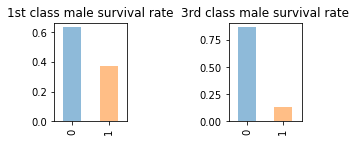

In [11]:
#  rich men survival
plt.subplot2grid((2,4), (1,0))
df.Survived[(df.Sex == "M") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("1st class male survival rate")

#  poor men survival
plt.subplot2grid((2,4), (1,2))
df.Survived[(df.Sex == "M") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("3rd class male survival rate")
plt.show()

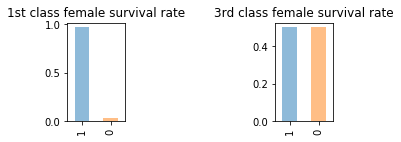

In [12]:
#  rich women survival
plt.subplot2grid((2,5), (1,0))
df.Survived[(df.Sex == "F") & (df.Pclass == 1)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("1st class female survival rate")

#  poor women survival
plt.subplot2grid((2,5), (1,3))
df.Survived[(df.Sex == "F") & (df.Pclass == 3)].value_counts(normalize=True).plot(kind="bar", alpha=0.5)
plt.title("3rd class female survival rate")
plt.show()

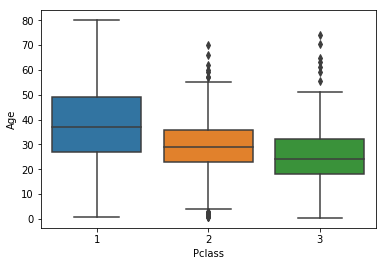

In [13]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [14]:
# cleaning data and modifying data for better analysis 
df.Embarked=df.Embarked.replace({"S":0,"C":1,"Q":2})
df.Sex=df.Sex.replace({"M":0,"F":1})
df.Age = df.Age.fillna(df.Age.dropna().median())
df.Fare = df.Fare.fillna(df.Fare.dropna().median())

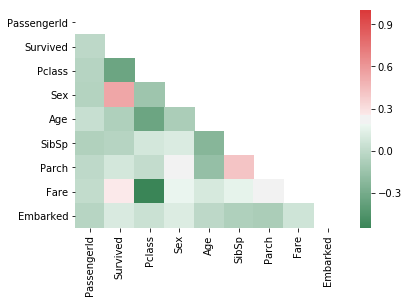

In [15]:
corr = df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 12, as_cmap=True)

# mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,
            mask=mask,
            cmap=cmap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Hypothesis: class ,gender and age can predict survival with a .8 of accuracy

<h1>Machine Learning</h1>

In [18]:
from sklearn import linear_model,preprocessing,tree,model_selection

In [19]:
# cleaned and open train data
train = df.copy()
del df

In [20]:
# fixing values
train_y = train.Survived.values
train_x =train[["Pclass","Age",'Sex',"Fare","SibSp","Embarked"]]
train_x = train_x.fillna(train_x.mean()).values

### Linear Model

In [21]:
classifier = linear_model.LogisticRegression().fit(train_x,train_y)

In [22]:
print(classifier.score(train_x, train_y  ))


0.797979797979798


### Polynomial Model

In [23]:
poly_features = preprocessing.PolynomialFeatures(degree=2)
poly_features=poly_features.fit_transform(train_x)
poly_classifier =  linear_model.LogisticRegression().fit(poly_features,train_y)

In [24]:
print(poly_classifier.score(poly_features, train_y  ))

0.8327721661054994


### Random Decision Tree

In [25]:
decision_tree_classifier = tree.DecisionTreeClassifier(random_state=25,max_depth=7,min_samples_split=2)
decision_tree_classifier = decision_tree_classifier.fit(train_x,train_y)

In [31]:
# gen score
gen_score = decision_tree_classifier.score(train_x,train_y)
# cross validate score
cross_vali = model_selection.cross_val_score(decision_tree_classifier,train_x,train_y,cv=50)
print("gen_score:",gen_score,"\ncross validated score:", cross_vali.mean())

gen_score: 0.8787878787878788 
cross validated score: 0.8297875816993464
